In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

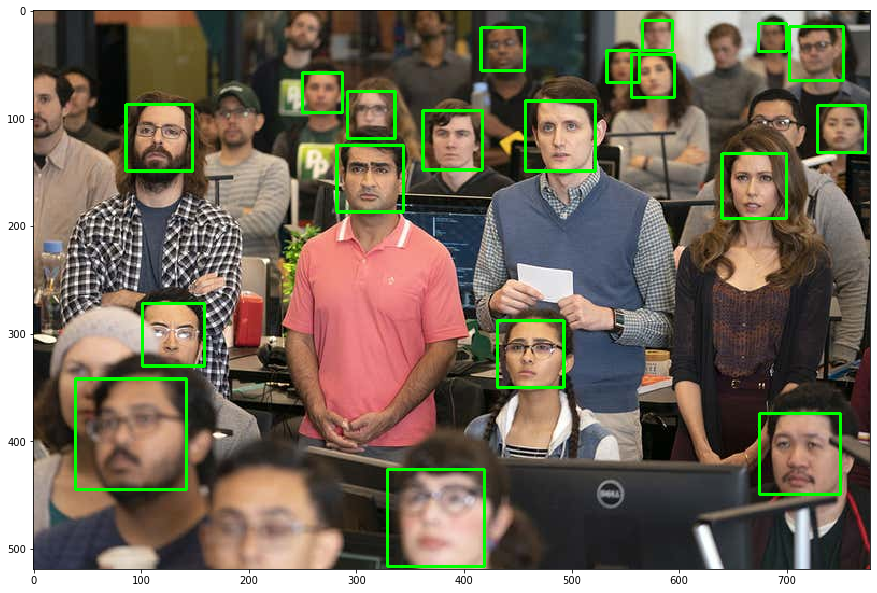

In [3]:
imagePath = "./data/faces2.jpg"
cascPath = "./xml/haarcascade_frontalface_default.xml" #이것이 뭐냐면 학습된 결과가 XML 파일형태로 저장되어 있다.

#Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath) #객체를 생성하고 학습된 결과를 넣어준다.

#Read the image
image = cv2.imread(imagePath)
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #이미지를 회색으로 변경

#Detect faces in the image
#얼굴을 찾을 수도 있고 번호판으 찾을 수도 있고 여러가지가 될 수 있다.
faces = faceCascade.detectMultiScale(gray,
                                    minNeighbors = 5, # 얼굴 사이의 최소간격 입니다.
                                    minSize=(20,20)) # 얼굴의 최소 크기 입니다.

# 검출된 얼굴 주변에 사격형 그리기
for (x,y,w,h) in faces:
    cv2.rectangle(imageRGB,(x,y),(x+w, y+h),(0,255,0),2)
    
# 얼굴을 검출한 이미지를 화면에 띄웁니다.
plt.figure(figsize=(15,15))
plt.imshow(imageRGB)

In [4]:
def FaceDetection(image):
    faceimage = image.copy()
    
    #Create the haar cascade
    faceCascade = cv2.CascadeClassifier(cascPath)
    
    # Read the image
    gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    
    #Detect faces in the image
    faces = faceCascade.detectMultiScale(gray, minNeighbors=5, minSize=(20,20))
    
    #검출된 얼굴 주변에 사각형 그리기
    for (x,y,w,h) in faces:
        cv2.rectangle(faceimage, (x,y),(x+w,y+h),(0,255,0),2)
        
    return faceimage

In [5]:
cap = cv2.VideoCapture("./data/siliconvalley.mp4")

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print("frame_size = ", frame_size)

while True:
    retval, frame = cap.read()
    
    if not retval:
        break
    
    face = FaceDetection(frame)
    cv2.imshow("face", face)
    
    key = cv2.waitKey(25)
    if key ==27:
        break
        
if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

#Tracking 방법을 이용하면 실시간으로 얼구을 추적해서 더욱 빠르게 할 수 있다.

frame_size =  (576, 324)
